In [51]:
import math as Math
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image, ImageOps

#### Problem 1: Difference of Gaussians for 3 Levels of Scale Space

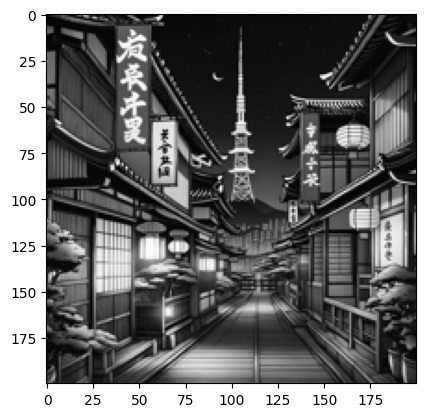

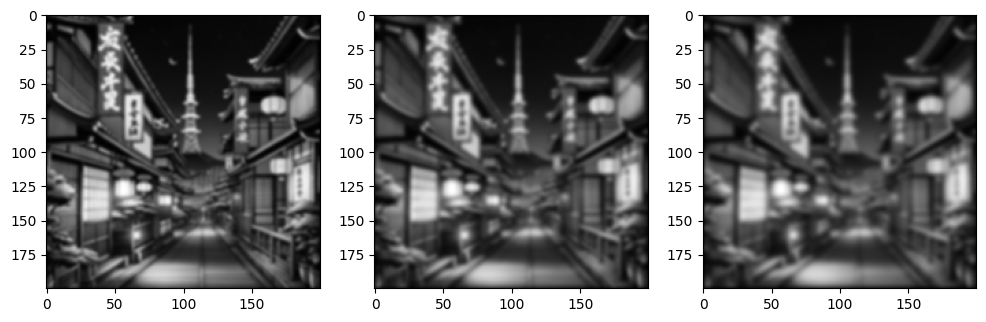

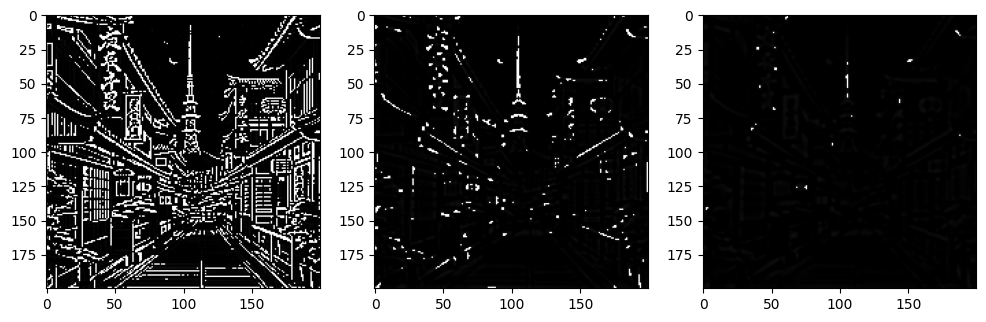

In [87]:
## STEP 1: hardcode blurring kernel (this is a constant)
blur = np.array([
    [1,  4,  6,  4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1,  4,  6,  4, 1]
])

## STEP 2: define plotter, blurring and padding functions

def plot_images(img_1: np.array, img_2: np.array, img_3: np.array):
    _, ax = plt.subplots(1, 3, figsize=(12, 6))
    ax[0].imshow(img_1, cmap='gray')
    ax[1].imshow(img_2, cmap='gray')
    ax[2].imshow(img_3, cmap='gray')

def calculate_target_dim(img_size: int, kernel_size: int) -> int:
    dim = 0
    for i in range(img_size):
        if (i + kernel_size) <= img_size:
            dim += 1

    return dim

def convolve(img: np.array, kernel: np.array) -> np.array:
    k = kernel.shape[0]

    tgt_dim = calculate_target_dim(img_size=img.shape[0], kernel_size=k)

    convolved_img = np.zeros(shape=(tgt_dim, tgt_dim))

    for i in range(tgt_dim):
        for j in range(tgt_dim):
            mat = img[i:i+k, j:j+k]
            convolved_img[i, j] = (np.sum(np.multiply(mat, kernel))) / 256

    return convolved_img

def blur_with_padded(img: np.array, kernel: np.array) -> np.array:
    padding = Math.floor(kernel.shape[0] / 2)

    img_with_padding = np.zeros(shape=(
        img.shape[0] + (2 * padding),
        img.shape[1] + (2 * padding)
    ))

    img_with_padding[padding:-padding, padding:-padding] = img
    blurred = convolve(img=img_with_padding, kernel=blur)
    return blurred

def map_for_display(img: np.array) -> np.array:
    img[img < 0] = 0
    img[img > 15] = 255
    return img

## STEP 3: import image and resize to 200x200
url = 'https://storage.googleapis.com/pai-images/bf26ed3d596b4484a475aeee646306b1.jpeg'
res = requests.get(url, stream=True)
img = ImageOps.grayscale(Image.open(res.raw).resize((200, 200)))
# display(img)

## STEP 4: convolve img with our gaussian filter
    # - this blurring technique is implemented 3 consecutive times to generate 3 different images
plt.imshow(img, cmap='gray')

img_blurred_1 = blur_with_padded(img=np.array(img), kernel=blur)
img_blurred_2 = blur_with_padded(img=np.array(img_blurred_1), kernel=blur)
img_blurred_3 = blur_with_padded(img=np.array(img_blurred_2), kernel=blur)
plot_images(img_1=img_blurred_1, img_2=img_blurred_2, img_3=img_blurred_3)

## STEP 5: Difference of Gaussians
scale_space_1 = map_for_display(img - img_blurred_1)
scale_space_2 = map_for_display(img_blurred_1 - img_blurred_2)
scale_space_3 = map_for_display(img_blurred_2 - img_blurred_3)
plot_images(img_1=scale_space_1, img_2=scale_space_2, img_3=scale_space_3)
